# anyBSM/anyH3 Tutorial

## Import anyBSM

The `anyBSM` package consist of several submodules:

In [1]:
import anyBSM
import inspect

In [2]:
[m[0] for m in inspect.getmembers(anyBSM) if inspect.isclass(m[1]) ]

['anyBSM',
 'anyEWPO',
 'anyH3',
 'anyModel',
 'anyPerturbativeUnitarity',
 'anyProcess']

where e.g. 
  * `anyModel` is the base class defining all UFO-related methods
  * `anyProcess` is handling the calculation of generic Feynman diagrams and is based on `anyModel`
  * `anyH3` is defining the calculation of the **renormalised** trilinear self-coupling and is based on `anyProcess`
  * `anyPerturbativeUnitarity` provides the the calculation of the largest SS-SS scattering eigenvalue (based on `anyModel`)

The `anyBSM` module contains all of them i.e.
```python
from anyBSM import anyBSM
```
gives access to all methods that are defined in e.g. `anyH3`, `anyPerturbativeUnitarity` etc. and allows to calculate e.g. the trilinear self-coupling and the perturbative unitarity limits at the same time.

Thus the simple import of `anyBSM` is always recommended:

In [3]:
from anyBSM import anyBSM # this should be at the top of every anyBSM-related code/calculation

## Model initialization

Model initialization is performed in the module `anyBSM.anyModel` which `anyBSM.anyBSM` inherits, too (imported above simply as `anyBSM`):

In [4]:
SSM = anyBSM(
    'SSM', # load the singlet extended SM
    scheme_name = "OS", # load the OS scheme (tadpoles renormalised MSbar)
    progress = False, # dont show any progress bars (default = True)
    caching = 2 # enable the cache (default = 2)
)

found the following SM(-like) particles:
Higgs-Boson (h1): (Mass Mh1 = 125.1)
W-Boson (Wp): (Mass MWp = 80.379)
Z-Boson (Z): (Mass MZ = 91.187)
Photon (A): (Mass ZERO = 0.0)
Top-Quark (u3): (Mass Mu3 = 172.5)
Bottom-Quark (d3): (Mass Md3 = 4.2)
Charm-Quark (u2): (Mass Mu2 = 1.27)
Strange-Quark (d2): (Mass Md2 = 0.104)
Up-Quark (u1): (Mass Mu1 = 0.0015)
Down-Quark (d1): (Mass Md1 = 0.0035)
Tau-Lepton (e3): (Mass Me3 = 1.776)
Muon-Lepton (e2): (Mass Me2 = 0.105)
Electron-Lepton (e1): (Mass Me1 = 0.000511)

Found the following SM input parameters:
VEV (vSM): (2*MWp*cmath.sqrt(1 - MWp**2/MZ**2))/el
alphaQEDinverse (aEWM1): 137.035999679
alphaQCD (aS): 0.119
GFermi (GFermi): 1.1663787e-05
Dalpha (Dalpha): 0.059157687



The anyBSM-instance `SSM` provides all methods to calculate e.g

 * the trilinear Higgs self-couplings (defined in `anyBSM.anyH3`)

In [5]:
SSM.lambdahhh()

{'total': (174.10927221397614+0j),
 'treelevel': (184.6446096691658-0j),
 'genuine': (-16.327950170494752-0j),
 'wfr': (4.0564828254674605-0j),
 'tads': (-9.981698213321497-0j),
 'massren': (20.23906582602774+0j),
 'vevren': (-8.520429602712472+0j),
 'customren': (-0.0008081201561263951+0j)}

  * the largest SS->SSS scattering eigenvalue (defined in `anyBSM.anyPerturbativeUnitarity`)

In [6]:
SSM.eigSSSS()

0.029862817395379018

 * bosonic one-,two- point functions such as e.g. the Higgs tadpole

In [7]:
SSM.Tadpole('h1')

(-223984.6134089417+0j)

The numerical input parameters are taken from the UFO model.  
Most functions allow to change the default values of the UFO parameters on-the-fly:

In [8]:
SSM.lambdahhh(parameters={'Mh1':122,'Mu3':163})['total'] # change the Higgs mass to 122GeV and top mass to 163GeV

(168.2344145011254+0j)

It is, however, always possible to change UFO parameter values directly using `setparameters()`:

In [9]:
SSM.setparameters({'Mh1':125.1,'Mu3':172.5}) # change back to the defaults

## Renormalisation schemes

Renormalisation schemes are defined in the file `schemes.yml` which is stored in the UFO model directory:

In [10]:
SSM.modeldir

'/home/martin/.config/anyBSM/models/SSM'

it can be read and edited with any text editor.  
Alternatively, list all renormalisation schemes defined in that file:

In [11]:
schemes=SSM.list_renormalization_schemes()
print(schemes.keys())
schemes['OStadpoles']

dict_keys(['MS', 'OS', 'OSmixing', 'OStadpoles'])


{'description': 'include h-tadpole via OS counterterm rather than non-PI diagrams; for alphaH=KapS=KapSH=0 this yields the same as the "OS" scheme',
 'mass_counterterms': {'h1': 'OS'},
 'VEV_counterterm': 'OS',
 'tadpoles': False,
 'custom_CT_hhh': "dTad = Tadpole('h1') \nself.custom_CT_hhh = f'-3*({dTad})/(vSM**2)'\n"}

a scheme can be activated/chosen with `load_renormalization_scheme()`:

In [12]:
SSM.load_renormalization_scheme('MS')
SSM.lambdahhh()['total']

found the following SM(-like) particles:
Higgs-Boson (h1): (Mass Mh1 = 125.1)
W-Boson (Wp): (Mass MWp = 80.379)
Z-Boson (Z): (Mass MZ = 91.187)
Photon (A): (Mass ZERO = 0.0)
Top-Quark (u3): (Mass Mu3 = 172.5)
Bottom-Quark (d3): (Mass Md3 = 4.2)
Charm-Quark (u2): (Mass Mu2 = 1.27)
Strange-Quark (d2): (Mass Md2 = 0.104)
Up-Quark (u1): (Mass Mu1 = 0.0015)
Down-Quark (d1): (Mass Md1 = 0.0035)
Tau-Lepton (e3): (Mass Me3 = 1.776)
Muon-Lepton (e2): (Mass Me2 = 0.105)
Electron-Lepton (e1): (Mass Me1 = 0.000511)

Found the following SM input parameters:
VEV (vSM): (2*MWp*cmath.sqrt(1 - MWp**2/MZ**2))/el
alphaQEDinverse (aEWM1): 137.035999679
alphaQCD (aS): 0.119
GFermi (GFermi): 1.1663787e-05
Dalpha (Dalpha): 0.059157687



(162.39144411081702+0j)

schemes can be changed between subsequent calls of e.g. `SSM.lamdbahhh()`:

In [13]:
SSM.quiet=True
for scheme in schemes.keys():
    SSM.load_renormalization_scheme(scheme)
    lam = SSM.lambdahhh()['total'].real
    print(f"{scheme:<10}: lam_hhh={lam: <10}")

MS        : lam_hhh=162.39144411081702
OS        : lam_hhh=174.10927221397614
OSmixing  : lam_hhh=173.86200550282888
OStadpoles: lam_hhh=174.14177193262285


### Dealing with the UFO model

The `SSM` anyBSM object provides full access to all SSM-UFO information.  
For instance, couplings/vertices can be issued as follows:

In [14]:
# top yukawa couplings
httbar=SSM.getcoupling('h1','u3','u3bar')
httbar

{'L': GC_153, 'R': GC_154}

In [15]:
httbar['L'].value

'(-1*complex(0,1)*Yu33*ZH11)/cmath.sqrt(2)'

In [16]:
# getcoupling also gives the correct sign for derivative-couplings
SSM.getcoupling('Ah','h1','Z')

{'c': GC_47, 'sign': -1}

particle information is stored in `SM.particles`:

In [17]:
SSM.particles.keys()

dict_keys(['U', 'S', 'F', 'V'])

In [18]:
SSM.particles['S'] # all scalars

[Hp, Hpc, Ah, h1, h2]

In [19]:
h = SSM.all_particles['h1'] # dictionary containing all particles

In [20]:
h.mass # h ist the UFO Particle() object with all UFO information

Mh1

### Finding/listing the SM-like particles and SM parameters

Also lists exists which collects all found SM-like particles and parameters:

In [21]:
SSM.SM_particles

{'Higgs-Boson': h1,
 'W-Boson': Wp,
 'Z-Boson': Z,
 'Photon': A,
 'Top-Quark': u3,
 'Bottom-Quark': d3,
 'Charm-Quark': u2,
 'Strange-Quark': d2,
 'Up-Quark': u1,
 'Down-Quark': d1,
 'Tau-Lepton': e3,
 'Muon-Lepton': e2,
 'Electron-Lepton': e1}

In [22]:
SSM.SM_parameters

{'VEV': vSM,
 'alphaQEDinverse': aEWM1,
 'alphaQCD': aS,
 'GFermi': GFermi,
 'Dalpha': Dalpha}

These are filled by the `SSM.find_SM_particles` and `SSM.find_SM_parameters` methods which are automatically called upon initialization.

### Evaluation modes

The default evaluation mode for all n-point functions is `numerical` (see examples above). However, one can also obtain results in analytical form:

In [23]:
SSM.set_evaluation_mode('analytical')

Per default all functions return strings in analytica/abbreviation-mode, which can be converted to sympy expressions using `SSM.sympify`:

In [24]:
# calculate singlet contribution to SM Higgs tadpole analytically
all_but_scalars = [p for p in SSM.all_particles.keys() if p != 'h2']
dtadS=SSM.Tadpole('h1',exclude_particles=all_but_scalars)
dtadS

'++0++-1*(+1*1/(16*pi**2))/2*(-I*(1)*((1*complex(0,1)*(-(ZH12*(ZH22*(LamSH*vSM*ZH21 + 2*(KapS + 6*LamS*vS)*ZH22) + ZH21*((KapSH + LamSH*vS)*ZH21 + LamSH*vSM*ZH22))) - ZH11*(ZH21*(3*Lam*vSM*ZH21 + (KapSH + LamSH*vS)*ZH22) + ZH22*((KapSH + LamSH*vS)*ZH21 + LamSH*vSM*ZH22))))))*A0(Mh2**2)+0'

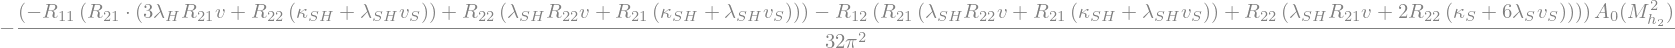

In [25]:
SSM.sympify(dtadS)

It is also possible to resolve relations between internal (lagrangian) and external (e.g. masses) parameters using `SolveDependencies`:

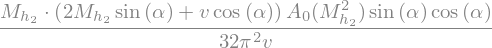

In [26]:
dtadSsym=SSM.SolveDependencies(
    dtadS, # sympify the result from above and apply all UFO internal<->external relations
    simplify = True, # simplify final result
    exclude = ['vSM'], # do not apply the relation for the SM VEV (i.e. do not replace it by MW,MZ,aEW)
    additional= {SSM.symbols['Mh1']: 0,
                 SSM.symbols['KapSH']: 0,
                 SSM.symbols['vS']:SSM.symbols['Mh2'],
                 SSM.symbols['KapS']:SSM.symbols['Mh2']
                } # additionally set the parameter KapSH=Mh1=0 and  KapS=vS=Mh2
    )
dtadSsym

sympy results can be modified like any other sympy object.  
Alternatively, they can be exported to Mathematica:

In [27]:
from sympy import mathematica_code
mathematica_code(dtadSsym)

'(1/32)*Mh2*(2*Mh2*Sin[alphaH] + vSM*Cos[alphaH])*A0[Mh2^2]*Sin[alphaH]*Cos[alphaH]/(Pi^2*vSM)'

In [28]:
# switch back to numerical evaluation mode
SSM.set_evaluation_mode('numerical')
SSM.evaluation

'numerical'

### Loading multiple models
It is possible to spawn as many `anyBSM` instances as one likes.  
For instance, one can load the SM model, calculate $\lambda_{hhh}$ and normalise the SSM result to it (see next section):

In [29]:
SM = anyBSM('SM', quiet=True, progress=False)
lamSM = SM.lambdahhh()['total'].real
lamSM

# Plot $\lambda_{hhh}^{\text{SSM}}$

importing `anyBSM.plotting` automatically places the anyH3 logo in all matplotlib plots

In [30]:
import anyBSM.plotting as plotting

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
Ms= np.linspace(start=130,stop=600, num=50)
lamh = [SSM.lambdahhh(parameters={'Mh2': M})['total'].real/lamSM for M in Ms]

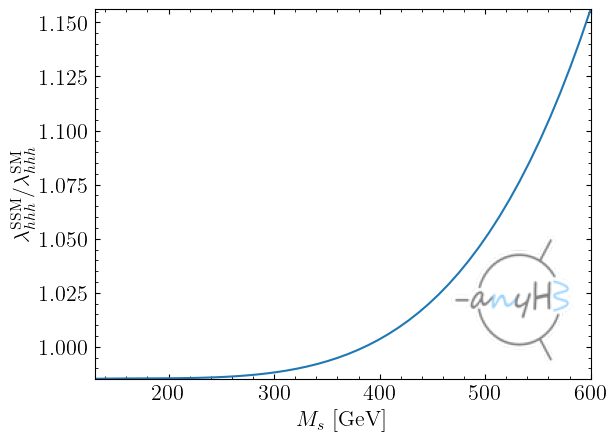

In [33]:
fig, ax = plt.subplots()
ax.plot(Ms,lamh)
ax.set_xlabel('$M_s$ [GeV]')
ax.set_ylabel(r'${\lambda_{hhh}^{\mathrm{SSM}}} / {\lambda_{hhh}^{\mathrm{SM}}}$')
ax.margins(0,0)